In [1]:
# Dependencies
#import os
#import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns


In [4]:
pd.set_option('display.precision',2)
hsp_dat_file = "./resource/DM_PREV_ALL_STATES.xlsx"
# Reader data file create Dataframe 
df_hsp_dat_raw = pd.read_excel(hsp_dat_file)
df_hsp_dat_raw.head()

,Diagnosed Diabetes Prevalence,Unnamed: 1,Unnamed: 2,2004,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 63,Unnamed: 64,Unnamed: 65,2013,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,State,FIPS Codes,County,number,percent,lower confidence limit,upper confidence limit,age-adjusted percent,age-adjusted lower confidence limit,age-adjusted upper confidence limit,...,age-adjusted percent,age-adjusted lower confidence limit,age-adjusted upper confidence limit,number,percent,lower confidence limit,upper confidence limit,age-adjusted percent,age-adjusted lower confidence limit,age-adjusted upper confidence limit
1,Alabama,01001,Autauga County,3368,10,7.8,13,9.9,7.8,13,...,11,8.8,14,5144,13,10,16,12,9.6,15
2,Alabama,01003,Baldwin County,9509,8.1,6.5,9.9,7.2,5.7,9,...,9.1,7.6,11,15367,10,8.7,12,8.8,7.3,10
3,Alabama,01005,Barbour County,2117,10,7.9,13,9.7,7.7,12,...,15,12,18,3813,18,15,23,17,14,21
4,Alabama,01007,Bibb County,1406,8.9,6.9,12,9,6.9,12,...,12,9.7,16,2557,15,12,18,14,11,17


In [5]:
# Reterive applicatable data from raw data
df_hsp_dat = df_hsp_dat_raw.iloc[1:,0:3]
new_header1 = df_hsp_dat_raw.iloc[0,0:3]
df_hsp_dat.columns = new_header1
#
numbers = df_hsp_dat_raw.iloc[1:,range(4, 68, 7)]
new_header2 = df_hsp_dat_raw.iloc[0,range(4, 68, 7)]
numbers.columns = new_header2
yr = 2004

for col in range(len(numbers.columns)):
    df_hsp_dat[str(yr)] = numbers.iloc[:,col]
    yr+=1
    
df_hsp_dat.head()

,State,FIPS Codes,County,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
1,Alabama,01001,Autauga County,10,11,11,11,11,12,12,12,12,13
2,Alabama,01003,Baldwin County,8.1,8.4,9.1,9.4,9.8,11,12,12,11,10
3,Alabama,01005,Barbour County,10,11,12,13,14,14,14,15,16,18
4,Alabama,01007,Bibb County,8.9,9.4,11,12,11,12,11,13,13,15
5,Alabama,01009,Blount County,8.3,8.6,9.6,10,11,13,14,13,14,14


In [6]:
df_hsp_dat.count()

0
State         3224
FIPS Codes    3224
County        3224
2004          3224
2005          3224
2006          3224
2007          3224
2008          3224
2009          3224
2010          3224
2011          3224
2012          3224
2013          3224
dtype: int64

In [7]:
df_hsp_dat.replace('No Data', np.nan, inplace=True)
df_hsp_dat = df_hsp_dat.dropna(axis=0, how='any')
df_hsp_dat.count()

0
State         3215
FIPS Codes    3215
County        3215
2004          3215
2005          3215
2006          3215
2007          3215
2008          3215
2009          3215
2010          3215
2011          3215
2012          3215
2013          3215
dtype: int64

In [8]:
df_hsp_dat.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,3215.00,3215.00,3215.00,3215.00,3215.00,3215.00,3215.00,3215.00,3215.00,3215.00
mean,8.36,8.74,9.30,9.72,10.01,10.43,10.82,11.10,11.28,11.38
std,1.71,1.84,2.02,2.11,2.14,2.22,2.34,2.42,2.50,2.63
min,3.00,3.00,3.10,3.20,3.00,3.20,3.30,3.90,3.60,3.30
25%,7.30,7.60,8.00,8.30,8.55,8.90,9.20,9.45,9.60,9.60
50%,8.30,8.60,9.10,9.50,9.90,10.30,10.70,11.00,11.20,11.20
75%,9.30,9.70,10.50,11.00,11.40,11.80,12.30,12.60,12.80,13.00
max,15.80,17.70,17.50,18.60,18.20,19.80,19.40,21.60,23.50,24.30


In [9]:
df_hsp_dat['Average Chng']=df_hsp_dat.iloc[:,3:].diff(axis=1).mean(axis=1)
df_hsp_dat.head()

,State,FIPS Codes,County,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Average Chng
1,Alabama,01001,Autauga County,10.0,11.1,11.4,11.4,11.4,12.3,11.8,12.1,12.0,13.0,0.33
2,Alabama,01003,Baldwin County,8.1,8.4,9.1,9.4,9.8,11.4,11.8,11.5,10.8,10.4,0.26
3,Alabama,01005,Barbour County,10.1,10.7,12.4,13.0,13.6,14.0,14.2,14.8,16.2,18.4,0.92
4,Alabama,01007,Bibb County,8.9,9.4,10.9,11.6,11.1,11.8,11.1,12.7,13.2,14.8,0.66
5,Alabama,01009,Blount County,8.3,8.6,9.6,10.5,11.4,12.6,14.0,13.2,13.8,14.1,0.64


In [10]:
df_hsp_dat['2015']=df_hsp_dat['2013'] + 2*df_hsp_dat['Average Chng']
df_hsp_dat.head()

,State,FIPS Codes,County,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Average Chng,2015
1,Alabama,01001,Autauga County,10.0,11.1,11.4,11.4,11.4,12.3,11.8,12.1,12.0,13.0,0.33,13.67
2,Alabama,01003,Baldwin County,8.1,8.4,9.1,9.4,9.8,11.4,11.8,11.5,10.8,10.4,0.26,10.91
3,Alabama,01005,Barbour County,10.1,10.7,12.4,13.0,13.6,14.0,14.2,14.8,16.2,18.4,0.92,20.24
4,Alabama,01007,Bibb County,8.9,9.4,10.9,11.6,11.1,11.8,11.1,12.7,13.2,14.8,0.66,16.11
5,Alabama,01009,Blount County,8.3,8.6,9.6,10.5,11.4,12.6,14.0,13.2,13.8,14.1,0.64,15.39


In [11]:
df_hsp_dat.to_csv('./df_hsp_dat.csv')

In [12]:
print('Max: {0:.2f}\nMin: {1:.2f}\nMedian: {2:.2f}' .format(df_hsp_dat['2015'].max(), df_hsp_dat['2015'].min(), df_hsp_dat['2015'].median()))

Max: 27.37
Min: 3.37
Median: 11.81


In [13]:
from bs4 import BeautifulSoup
def color_map(ifn,ofn,FIPScol,Ratecol,scale):
    
    fn = ifn
    # Read in Disease rates
    patient_discharge = {}
    reader = csv.reader(open(fn), delimiter=",")
    for row in reader: 
        try:
            full_fips = row[FIPScol] 
            rate = float(row[Ratecol].strip())
            patient_discharge[full_fips] = rate
        except:
            pass

    # Load the SVG map
    svg = open('USA_Counties_with_FIPS_and_names.svg', 'r').read()

    # Load into Beautiful Soup
    soup = BeautifulSoup(svg, "lxml")

    # Find counties
    paths = soup.findAll('path')

    # Map colors from
    #http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3
    #colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]
    #colors = ['#ffffb2','#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']
    colors = ['#ffffb2','#fecc5c','#fd8d3c','#f03b20','#bd0026']

    # County style
    path_style='font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1; \
    stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt; \
    marker-start:none;stroke-linejoin:bevel;fill:'


    # Color the counties based on Disease Prevalence
    for p in paths:

        if p['id'] not in ["State_Lines", "separator"]:
            # pass
            try:
                rate = patient_discharge[p['id']]
            except:
                continue

            if rate > scale[3]:
                color_class = 4
            elif rate > scale[2]:
                color_class = 3
            elif rate > scale[1]:
                color_class = 2
            elif rate > scale[0]:
                color_class = 1
            #elif rate > 4:
            #    color_class = 1
            else:
                color_class = 0

            color = colors[color_class]
            p['style'] = path_style + color

    # Output map
    svg_prettified = ofn 
    with open(svg_prettified, 'w') as svg_out:
        svg_out.writelines(soup.prettify())


In [14]:
color_map('./df_hsp_dat.csv','USA_Counties_Diabetes_Prevalence15.svg',2,15,[13,6.5,10,14])

In [15]:
df_hrt_dat = pd.read_csv('./resource/heartdisease_rate.csv', dtype={'Value': 'float64', 'cnty_fips': 'object'})
df_hrt_dat.head()

,cnty_fips,County,State,Value,theme_range
0,01001,Autauga,AL,218.6,190.4 - 220.8 (640)
1,01003,Baldwin,AL,198.3,190.4 - 220.8 (640)
2,01005,Barbour,AL,258.9,220.9 - 568.7 (640)
3,01007,Bibb,AL,222.6,220.9 - 568.7 (640)
4,01009,Blount,AL,216.8,190.4 - 220.8 (640)


In [16]:
print('Max: {0:.2f}\nMin: {1:.2f}\nMedian: {2:.2f}' .format(df_hrt_dat['Value'].max(), df_hrt_dat['Value'].min(), df_hrt_dat['Value'].median()))

Max: 568.70
Min: -1.00
Median: 178.95


In [18]:
color_map('./resource/heartdisease_rate.csv','USA_Counties_HeartDisease_Prevalence15.svg',0,3,[10,100,200,360])

In [19]:
df_fas_food_dat = pd.read_csv('../resource/fastfood.csv', dtype={'FIPS': 'object', \
                                                                 'Fast Food Restaurants 2015 (PROJECTED)': 'float64'} )
df_fas_food_dat = df_fas_food_dat.drop('Unnamed: 0', axis=1)
df_fas_food_dat.head()

,FIPS,State,County,Fast Food Restaurants 2009,Fast Food Restaurants 2014,Fast-food restaurants (% change),"Fast-food restaurants/1,000 pop 2009",Yearly Growth Rate %,Fast Food Restaurants 2015 (PROJECTED)
0,01001,AL,Autauga,30,36,20.00,0.55,4.00,37.0
1,01003,AL,Baldwin,112,132,17.86,0.62,3.57,137.0
2,01005,AL,Barbour,21,22,4.76,0.76,0.95,22.0
3,01007,AL,Bibb,7,5,-28.57,0.31,-5.71,5.0
4,01009,AL,Blount,24,21,-12.50,0.42,-2.50,20.0


In [20]:
print('Max: {0:.2f}\nMin: {1:.2f}\nMedian: {2:.2f}' .format(df_fas_food_dat['Fast Food Restaurants 2015 (PROJECTED)'].max(), \
                                                            df_fas_food_dat['Fast Food Restaurants 2015 (PROJECTED)'].min(), \
                                                            df_fas_food_dat['Fast Food Restaurants 2015 (PROJECTED)'].median()))

Max: 7947.00
Min: 0.00
Median: 16.00


In [22]:
color_map('./resource/fastfood.csv','USA_FastFood15.svg',1,9,[3,100,500,1000])

In [23]:
df_hsp_reg = df_hsp_dat.iloc[0:,0:3]
df_hsp_reg['FastFood'] = df_fas_food_dat['Fast Food Restaurants 2015 (PROJECTED)']
df_hsp_reg['Diabetes'] = df_hsp_dat['2015']
df_hsp_reg['HeartDisease'] = df_hrt_dat['Value']
df_hsp_reg.head()

,State,FIPS Codes,County,FastFood,Diabetes,HeartDisease
1,Alabama,01001,Autauga County,137.0,13.67,198.3
2,Alabama,01003,Baldwin County,22.0,10.91,258.9
3,Alabama,01005,Barbour County,5.0,20.24,222.6
4,Alabama,01007,Bibb County,20.0,16.11,216.8
5,Alabama,01009,Blount County,3.0,15.39,223.9


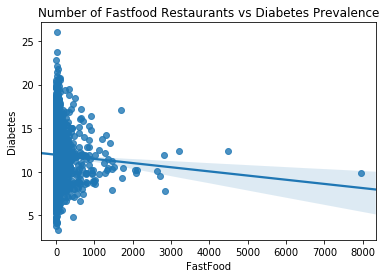

In [26]:
# rg=sns.regplot

x = 'FastFood'
y = 'Diabetes'
d = df_hsp_reg

# Show the results of a linear regression within each dataset
ax = sns.regplot(x=x, y=y, data=d)

plt.title('Number of Fastfood Restaurants vs Diabetes Prevalence')

plt.show()


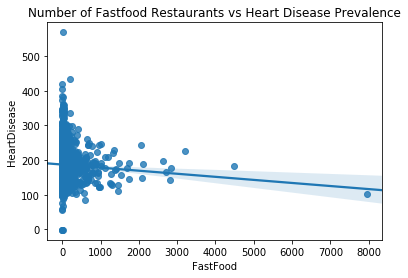

In [47]:
# rg=sns.regplot

x = 'FastFood'
y = 'HeartDisease'
d = df_hsp_reg

# Show the results of a linear regression within each dataset
ax = sns.regplot(x=x, y=y, data=d)

plt.title('Number of Fastfood Restaurants vs Heart Disease Prevalence')

plt.show()

In [ ]:
pd.reset_option('display.precision')